In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
data = df.iloc[:10, 2:6]
data.head()

,Fresh,Milk,Grocery,Frozen
0,12669,9656,7561,214
1,7057,9810,9568,1762
2,6353,8808,7684,2405
3,13265,1196,4221,6404
4,22615,5410,7198,3915


In [5]:
from sklearn.preprocessing import normalize
dfscaled = pd.DataFrame(normalize(data), columns = data.columns)
dfscaled.head()

,Fresh,Milk,Grocery,Frozen
0,0.718443,0.547580,0.428775,0.012136
1,0.454875,0.632326,0.616728,0.113574
2,0.469924,0.651517,0.568376,0.177895
3,0.863078,0.077817,0.274636,0.416672
4,0.917276,0.219432,0.291955,0.158794


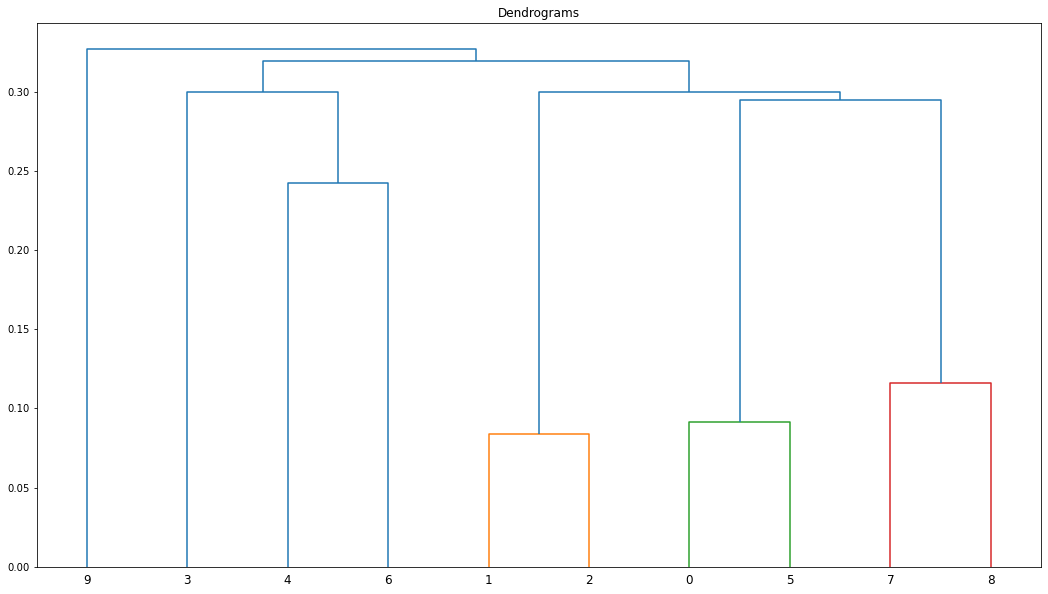

In [6]:
plt.figure(figsize = (18, 10))
plt.title("Dendrograms")
den = shc.dendrogram(shc.linkage(dfscaled))

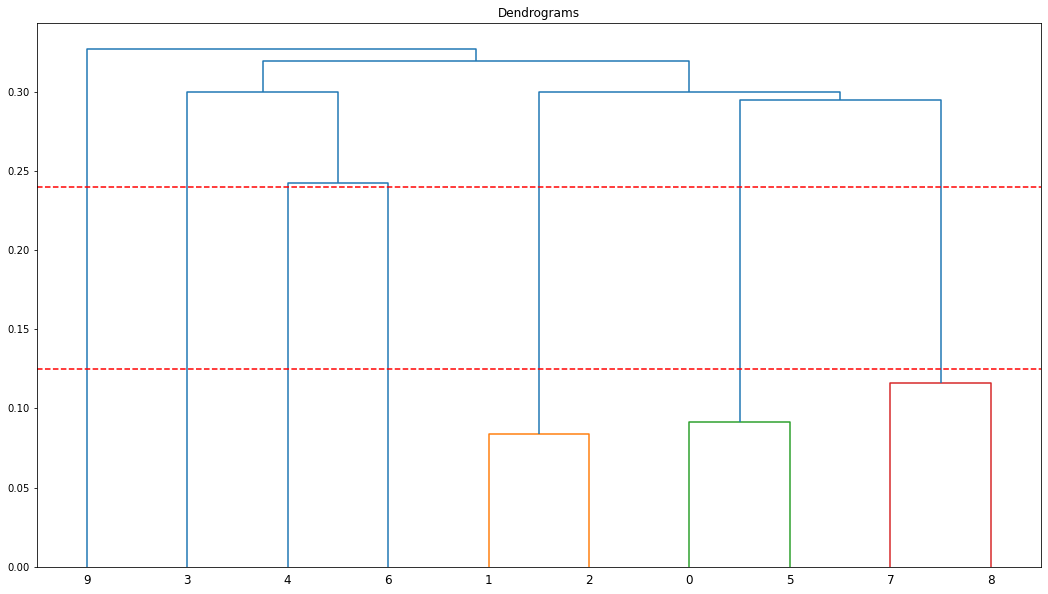

In [8]:
plt.figure(figsize = (18, 10))
plt.title("Dendrograms")
den = shc.dendrogram(shc.linkage(dfscaled))
plt.axhline(y = 0.125, color = "red", linestyle = "--")
plt.axhline(y = 0.24, color = "red", linestyle = "--");

In [9]:
data = df.iloc[:, 2:6]
data.head()
dfscaled = pd.DataFrame(normalize(data), columns = data.columns)
dfscaled.head()

,Fresh,Milk,Grocery,Frozen
0,0.718443,0.547580,0.428775,0.012136
1,0.454875,0.632326,0.616728,0.113574
2,0.469924,0.651517,0.568376,0.177895
3,0.863078,0.077817,0.274636,0.416672
4,0.917276,0.219432,0.291955,0.158794


In [17]:
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit_predict(dfscaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

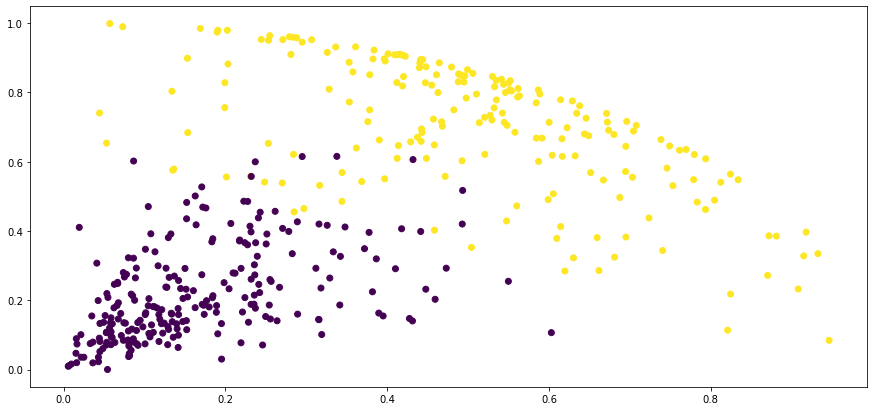

In [18]:
plt.figure(figsize = (15, 7))
plt.scatter(dfscaled['Milk'], dfscaled['Grocery'], c = cluster.labels_);